In [1]:
# https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
# imports

import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
# create our dictionary to hold all the students
student_dict = {'gender':[],'ethnicity':[], 'education':[], 'lunch':[], 'test_prep':[] , 'math_score': [], 'reading_score':[], 'writing_score':[]}
# read the csv file
with open("StudentsPerformance.csv", 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        student_dict['gender'].append(row[0])
        student_dict['ethnicity'].append(row[1])
        student_dict['education'].append(row[2])
        student_dict['lunch'].append(row[3])
        student_dict['test_prep'].append(row[4])
        student_dict['math_score'].append(row[5])
        student_dict['reading_score'].append(row[6])
        student_dict['writing_score'].append(row[7])

In [ ]:
student_dict['math_score']

In [35]:
# remove the header (first row)
for key in student_dict.keys():
    student_dict[key] = student_dict[key][1:]

In [36]:
# create dicitonaries of specific variables of interest

def group_by(main_key, subkeys, student_dict):
    # math_scores = [].copy()
    # writing_scores = [].copy()
    # reading_Scores = [].copy()

    # I needed to intialize this every time in the for loop for each key

    dict_to_return = {}.copy()

    # zip the data into the relevant keys and scores
    for my_sub_key in subkeys: # subkeys has been passed into the function e.g ['male', 'female'] in the case of gender
        math_scores = [].copy()
        writing_scores = [].copy()
        reading_scores = [].copy()
        for math, writing, reading, key in zip (student_dict['math_score'], student_dict['writing_score'], student_dict['reading_score'], student_dict[main_key]):
            if key == my_sub_key: # e.g if the row item == 'female' or 'male' etc
                math_scores.append(float(math))
                writing_scores.append(float(writing))
                reading_scores.append(float(reading))
        dict_to_return[my_sub_key] = [math_scores, writing_scores, reading_scores]
    
    return dict_to_return


def group_by2(main_key, student_dict):
    '''
    This uses a set to extract the subkeys 
    '''
    subkeys = set(student_dict[main_key])
    print(subkeys)
    dict_to_return = {}.copy()
    # zip the data into the relevant keys and scores
    for my_sub_key in subkeys: # subkeys has been passed into the function e.g ['male', 'female'] in the case of gender
        math_scores = [].copy()
        writing_scores = [].copy()
        reading_scores = [].copy()
        for math, writing, reading, key in zip (student_dict['math_score'], student_dict['writing_score'], student_dict['reading_score'], student_dict[main_key]):
            if key == my_sub_key: # e.g if the row item == 'female' or 'male' etc
                math_scores.append(float(math))
                writing_scores.append(float(writing))
                reading_scores.append(float(reading))
        dict_to_return[my_sub_key] = [math_scores, writing_scores, reading_scores]
    
    return dict_to_return

In [39]:
my_gender_dict = group_by('gender', ['male', 'female'],student_dict)
my_ethnicity_dict = group_by('ethnicity', ['group A', 'group B', 'group C', 'group D', 'group E'], student_dict)


{'some high school', 'high school', 'some college', "bachelor's degree", "associate's degree", "master's degree"}
{'free/reduced', 'standard'}
{'group A', 'group C', 'group D', 'group E', 'group B'}


In [13]:
def produce_plotting_data(data_dict):
    x = list(data_dict.keys()) # x is the label of the categories

    # let's compute the y values: e.g.g sum or average
    # scores = [].copy() # BUG: This needed to be in the for loop
    y = [].copy() # we return this

    for key in x:
        scores = [].copy()
        scores.extend([data_dict[key][0], data_dict[key][1], data_dict[key][2]] ) # creating a new list with all the scores 
        # e.g my_gender_dict['male'][0]  is the list containing the math scores for all male students
        avg  = np.mean(scores)
        print(avg)
        y.append(avg)
    return x, y

65.8374827109267
69.56949806949807


<BarContainer object of 2 artists>

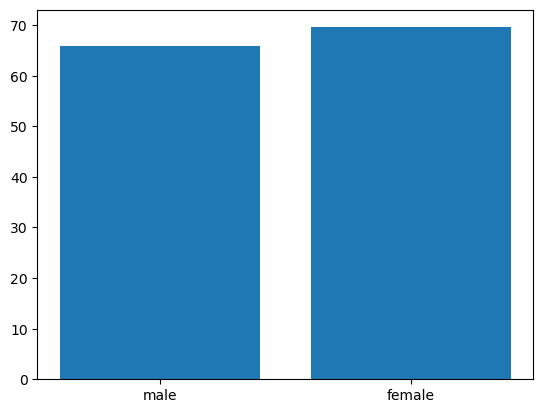

In [15]:
x,y = produce_plotting_data(my_gender_dict)
plt.bar(x,y)

62.99250936329588
65.46842105263158
67.13166144200628
69.1793893129771
72.75238095238095


<BarContainer object of 5 artists>

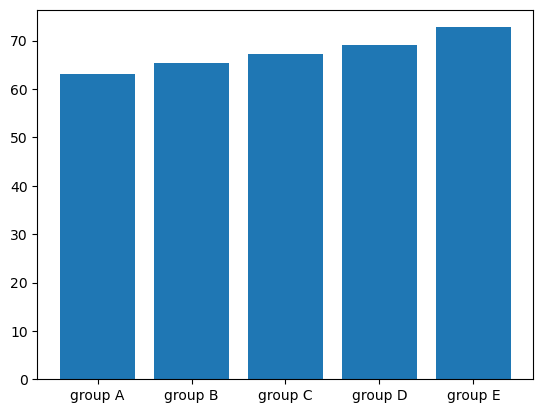

In [16]:
x,y = produce_plotting_data(my_ethnicity_dict)
plt.bar(x,y)

{'free/reduced', 'standard'}
62.19906103286385
70.8343685300207


<BarContainer object of 2 artists>

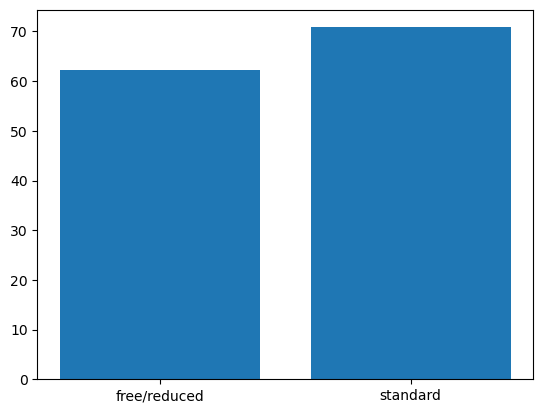

In [42]:
# lunch 
my_lunch_dict = group_by2('lunch', student_dict)
x,y = produce_plotting_data(my_lunch_dict)
plt.bar(x,y)


{'some high school', 'high school', 'some college', "bachelor's degree", "associate's degree", "master's degree"}
65.10800744878958
63.0969387755102
68.476401179941
71.91737891737891
69.56906906906907
73.59887005649718


<BarContainer object of 6 artists>

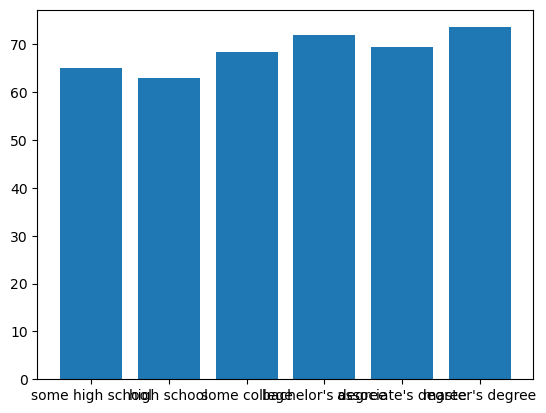

In [43]:
my_education_dict = group_by2('education', student_dict)
x,y = produce_plotting_data(my_education_dict)
plt.bar(x,y)


{'completed', 'none'}
72.66945996275605
65.02704108164326


<BarContainer object of 2 artists>

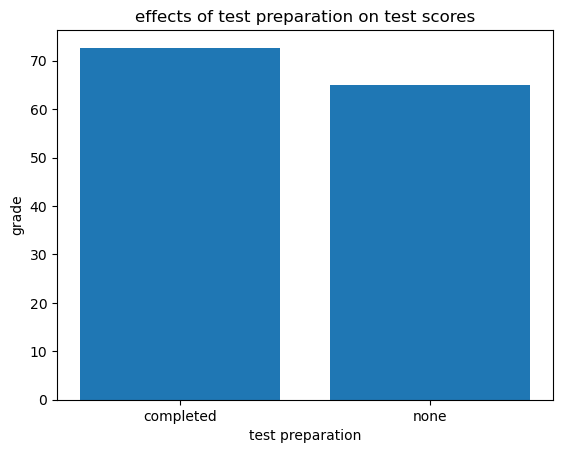

In [46]:
test_prep_dict = group_by2('test_prep', student_dict)
x,y = produce_plotting_data(test_prep_dict)
plt.xlabel('test preparation')
plt.ylabel('grade')
plt.title("effects of test preparation on test scores")
plt.bar(x,y)

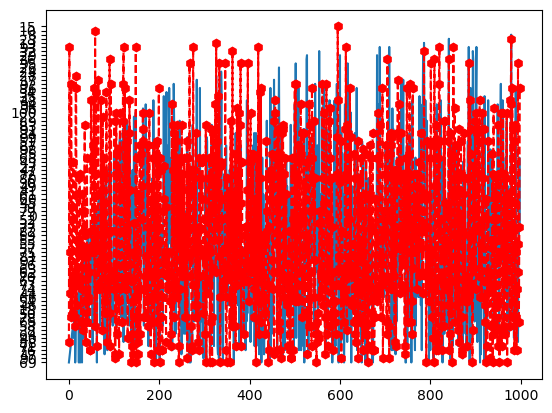

In [53]:
plt.plot(student_dict['math_score'])
plt.plot(student_dict['writing_score'], 'h--r')